In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
repo_root = os.popen('git rev-parse --show-toplevel').read().strip()

In [3]:
data_folder = os.path.join(repo_root, 'multi-parameter-estimation', 'data')

# Get list of data directories
data_dirs = os.listdir(data_folder)
data_dirs = [d for d in data_dirs if os.path.isdir(os.path.join(data_folder, d))]
data_dirs.sort()
data_dirs

['2025-06-03--11h-02m-55s',
 '2025-06-03--11h-04m-33s',
 '2025-06-03--11h-05m-58s',
 '2025-06-03--11h-07m-21s',
 '2025-06-03--11h-08m-43s',
 '2025-06-03--11h-10m-06s',
 '2025-06-03--11h-11m-30s',
 '2025-06-03--11h-12m-54s',
 '2025-06-03--11h-14m-20s',
 '2025-06-03--11h-15m-44s',
 '2025-06-03--11h-17m-10s',
 '2025-06-03--11h-18m-35s',
 '2025-06-03--11h-20m-00s',
 '2025-06-03--11h-21m-24s',
 '2025-06-03--11h-22m-50s',
 '2025-06-03--11h-24m-16s',
 '2025-06-03--11h-25m-44s',
 '2025-06-03--11h-27m-10s',
 '2025-06-03--11h-28m-52s',
 '2025-06-03--11h-30m-17s',
 '2025-06-03--11h-31m-43s',
 '2025-06-03--11h-33m-09s',
 '2025-06-03--11h-34m-37s',
 '2025-06-03--11h-36m-03s',
 '2025-06-03--11h-37m-30s',
 '2025-06-03--11h-38m-56s',
 '2025-06-03--11h-40m-23s',
 '2025-06-03--11h-41m-53s',
 '2025-06-03--11h-43m-21s',
 '2025-06-03--11h-44m-49s',
 '2025-06-03--11h-46m-15s',
 '2025-06-03--11h-47m-43s',
 '2025-06-03--11h-49m-09s',
 '2025-06-03--11h-50m-33s',
 '2025-06-03--11h-51m-57s',
 '2025-06-03--11h-53

In [4]:
def load_estimates_and_params(data_dir):
    params = pd.read_csv(os.path.join(data_folder, data_dir, "params.csv"))
    estimates = pd.read_csv(os.path.join(data_folder, data_dir, "estimators.csv"))
    estimates["data_dir"] = data_dir
    estimates["theta"] = params["theta"].values[0]
    estimates["delta_phi"] = params["delta_phi"].values[0]
    # if repetitions is not in params, set it to 1
    if "repetitions" not in params.columns:
        params["repetitions"] = pd.Series([1])
    else:
        params["repetitions"] = params["repetitions"].astype(int)

    return estimates

# Load estimates and parameters for each data directory
estimates_list = []
for data_dir in data_dirs:
    # Skip the directories with no estimates
    if not os.path.exists(os.path.join(data_folder, data_dir, "estimators.csv")):
        continue
    estimates = load_estimates_and_params(data_dir)
    estimates_list.append(estimates)
# Concatenate all estimates into a single DataFrame
estimates_df = pd.concat(estimates_list, ignore_index=True)
estimates_df

,data_dir,C,DB_H,DB_V,SB,N,repetition,theta_estimate,delta_phi_estimate,theta,delta_phi
0,2025-06-03--11h-02m-55s,1.0,39.0,0.0,0.0,40.0,NaN,0.224075,1.570796,0.000000,0.000000
1,2025-06-03--11h-02m-55s,3.0,37.0,0.0,0.0,40.0,NaN,0.389761,1.570796,0.000000,0.000000
2,2025-06-03--11h-02m-55s,1.0,39.0,0.0,0.0,40.0,NaN,0.224075,1.570796,0.000000,0.000000
3,2025-06-03--11h-02m-55s,1.0,39.0,0.0,0.0,40.0,NaN,0.224075,1.570796,0.000000,0.000000
4,2025-06-03--11h-02m-55s,3.0,37.0,0.0,0.0,40.0,NaN,0.389761,1.570796,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
1251146,2025-06-03--13h-04m-03s,102.0,52.0,43.0,3.0,200.0,NaN,1.525781,1.400950,1.570796,1.570796
1251147,2025-06-03--13h-04m-03s,112.0,46.0,41.0,1.0,200.0,NaN,1.545794,1.476585,1.570796,1.570796
1251148,2025-06-03--13h-04m-03s,107.0,57.0,32.0,4.0,200.0,NaN,1.445468,1.379806,1.570796,1.570796
1251149,2025-06-03--13h-04m-03s,76.0,67.0,52.0,5.0,200.0,NaN,1.495726,1.319715,1.570796,1.570796


In [5]:
estimates_df["theta_degrees"] = np.degrees(estimates_df["theta"])
estimates_df["delta_phi_degrees"] = np.degrees(estimates_df["delta_phi"])
estimates_df

,data_dir,C,DB_H,DB_V,SB,N,repetition,theta_estimate,delta_phi_estimate,theta,delta_phi,theta_degrees,delta_phi_degrees
0,2025-06-03--11h-02m-55s,1.0,39.0,0.0,0.0,40.0,NaN,0.224075,1.570796,0.000000,0.000000,0.0,0.0
1,2025-06-03--11h-02m-55s,3.0,37.0,0.0,0.0,40.0,NaN,0.389761,1.570796,0.000000,0.000000,0.0,0.0
2,2025-06-03--11h-02m-55s,1.0,39.0,0.0,0.0,40.0,NaN,0.224075,1.570796,0.000000,0.000000,0.0,0.0
3,2025-06-03--11h-02m-55s,1.0,39.0,0.0,0.0,40.0,NaN,0.224075,1.570796,0.000000,0.000000,0.0,0.0
4,2025-06-03--11h-02m-55s,3.0,37.0,0.0,0.0,40.0,NaN,0.389761,1.570796,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251146,2025-06-03--13h-04m-03s,102.0,52.0,43.0,3.0,200.0,NaN,1.525781,1.400950,1.570796,1.570796,90.0,90.0
1251147,2025-06-03--13h-04m-03s,112.0,46.0,41.0,1.0,200.0,NaN,1.545794,1.476585,1.570796,1.570796,90.0,90.0
1251148,2025-06-03--13h-04m-03s,107.0,57.0,32.0,4.0,200.0,NaN,1.445468,1.379806,1.570796,1.570796,90.0,90.0
1251149,2025-06-03--13h-04m-03s,76.0,67.0,52.0,5.0,200.0,NaN,1.495726,1.319715,1.570796,1.570796,90.0,90.0


In [6]:
# plot the theta estimate against theta

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=estimates_df, x="theta", y="theta_estimate", hue="N", palette="deep")

# no legend
plt.legend([], [], frameon=False)

plt.tight_layout()
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "theta_estimate_vs_true_theta.png")
plt.savefig(file_name, dpi=300)
plt.show()

KeyboardInterrupt: 

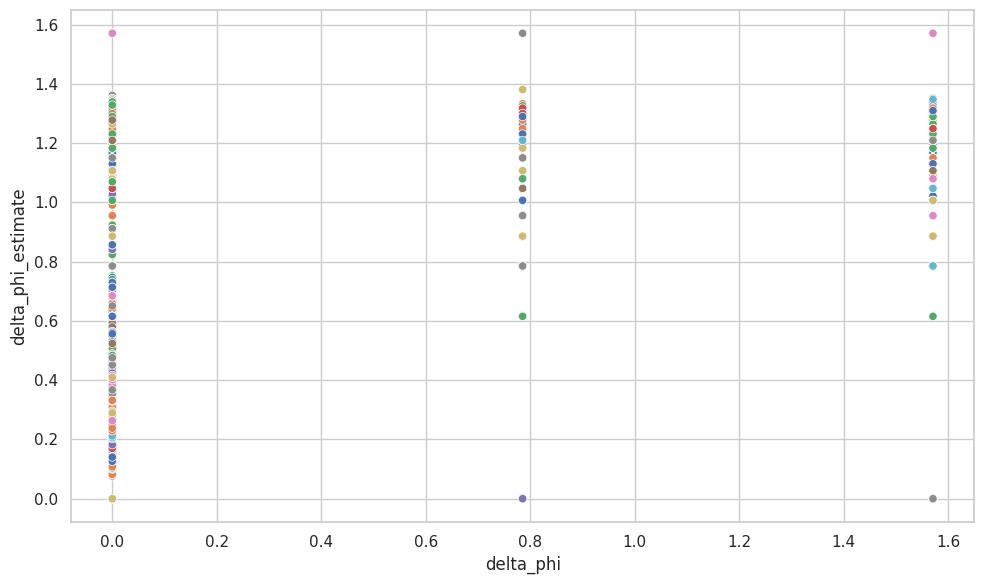

In [ ]:
# plot the theta estimate against theta
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=estimates_df, x="delta_phi", y="delta_phi_estimate", hue="N", palette="deep")

# no legend
plt.legend([], [], frameon=False)

plt.tight_layout()

# save the figure
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "delta_phi_estimate_vs_true_delta_phi.png")
plt.savefig(file_name, dpi=300)
plt.show()

In [7]:
estimates_summary_df = estimates_df.groupby(["data_dir", "N"]).agg({
    "theta_estimate": ["mean", "std", "var"],
    "delta_phi_estimate": ["mean", "std", "var"],
    "theta": ["mean"],
    "delta_phi": ["mean"]
}).reset_index().rename(columns={"data_dir": "Data Directory"})
estimates_summary_df

Data Directory         N theta_estimate                      \
                                                 mean       std       var   
0    2025-06-03--11h-02m-55s      40.0       0.229990  0.144735  0.020948   
1    2025-06-03--11h-02m-55s      80.0       0.254714  0.093813  0.008801   
2    2025-06-03--11h-02m-55s     120.0       0.261684  0.071774  0.005152   
3    2025-06-03--11h-02m-55s     160.0       0.264478  0.060438  0.003653   
4    2025-06-03--11h-02m-55s     200.0       0.266035  0.053027  0.002812   
..                       ...       ...            ...       ...       ...   
505  2025-06-03--13h-04m-03s      80.0       1.543203  0.079525  0.006324   
506  2025-06-03--13h-04m-03s     120.0       1.543229  0.064654  0.004180   
507  2025-06-03--13h-04m-03s     160.0       1.543241  0.056534  0.003196   
508  2025-06-03--13h-04m-03s     200.0       1.543244  0.050254  0.002525   
509  2025-06-03--13h-04m-03s  246954.5       1.543290       NaN       NaN   

    delta_phi_estimate                         theta delta_phi  
                  mean       std       var      mean      mean  
0             1.499747  0.270235  0.073027  0.000000  0.000000  
1             1.492284  0.227033  0.051544  0.000000  0.000000  
2             1.479581  0.215937  0.046629  0.000000  0.000000  
3             1.471318  0.197450  0.038987  0.000000  0.000000  
4             1.463144  0.185851  0.034540  0.000000  0.000000  
..                 ...       ...       ...       ...       ...  
505           1.425073  0.104031  0.010822  1.570796  1.570796  
506           1.413563  0.085079  0.007238  1.570796  1.570796  
507           1.406683  0.070865  0.005022  1.570796  1.570796  
508           1.401987  0.058763  0.003453  1.570796  1.570796  
509           1.391249       NaN       NaN  1.570796  1.570796  

[510 rows x 10 columns]

In [8]:
estimates_summary_df["2_n_var"] = estimates_summary_df["N"] * 2 * estimates_summary_df["theta_estimate"]["var"]
estimates_summary_df["theta_error"] = estimates_summary_df["theta_estimate"]["mean"] - estimates_summary_df["theta"]["mean"]
estimates_summary_df["root_n_theta_error"] = np.sqrt(estimates_summary_df["N"]) * estimates_summary_df["theta_error"]
estimates_summary_df

Data Directory         N theta_estimate                      \
                                                 mean       std       var   
0    2025-06-03--11h-02m-55s      40.0       0.229990  0.144735  0.020948   
1    2025-06-03--11h-02m-55s      80.0       0.254714  0.093813  0.008801   
2    2025-06-03--11h-02m-55s     120.0       0.261684  0.071774  0.005152   
3    2025-06-03--11h-02m-55s     160.0       0.264478  0.060438  0.003653   
4    2025-06-03--11h-02m-55s     200.0       0.266035  0.053027  0.002812   
..                       ...       ...            ...       ...       ...   
505  2025-06-03--13h-04m-03s      80.0       1.543203  0.079525  0.006324   
506  2025-06-03--13h-04m-03s     120.0       1.543229  0.064654  0.004180   
507  2025-06-03--13h-04m-03s     160.0       1.543241  0.056534  0.003196   
508  2025-06-03--13h-04m-03s     200.0       1.543244  0.050254  0.002525   
509  2025-06-03--13h-04m-03s  246954.5       1.543290       NaN       NaN   

    delta_phi_estimate                         theta delta_phi   2_n_var  \
                  mean       std       var      mean      mean             
0             1.499747  0.270235  0.073027  0.000000  0.000000  1.675867   
1             1.492284  0.227033  0.051544  0.000000  0.000000  1.408135   
2             1.479581  0.215937  0.046629  0.000000  0.000000  1.236365   
3             1.471318  0.197450  0.038987  0.000000  0.000000  1.168878   
4             1.463144  0.185851  0.034540  0.000000  0.000000  1.124747   
..                 ...       ...       ...       ...       ...       ...   
505           1.425073  0.104031  0.010822  1.570796  1.570796  1.011875   
506           1.413563  0.085079  0.007238  1.570796  1.570796  1.003228   
507           1.406683  0.070865  0.005022  1.570796  1.570796  1.022745   
508           1.401987  0.058763  0.003453  1.570796  1.570796  1.010177   
509           1.391249       NaN       NaN  1.570796  1.570796       NaN   

    theta_error root_n_theta_error  
                                    
0      0.229990           1.454584  
1      0.254714           2.278230  
2      0.261684           2.866600  
3      0.264478           3.345417  
4      0.266035           3.762300  
..          ...                ...  
505   -0.027593          -0.246803  
506   -0.027568          -0.301989  
507   -0.027555          -0.348547  
508   -0.027552          -0.389643  
509   -0.027507         -13.669227  

[510 rows x 13 columns]

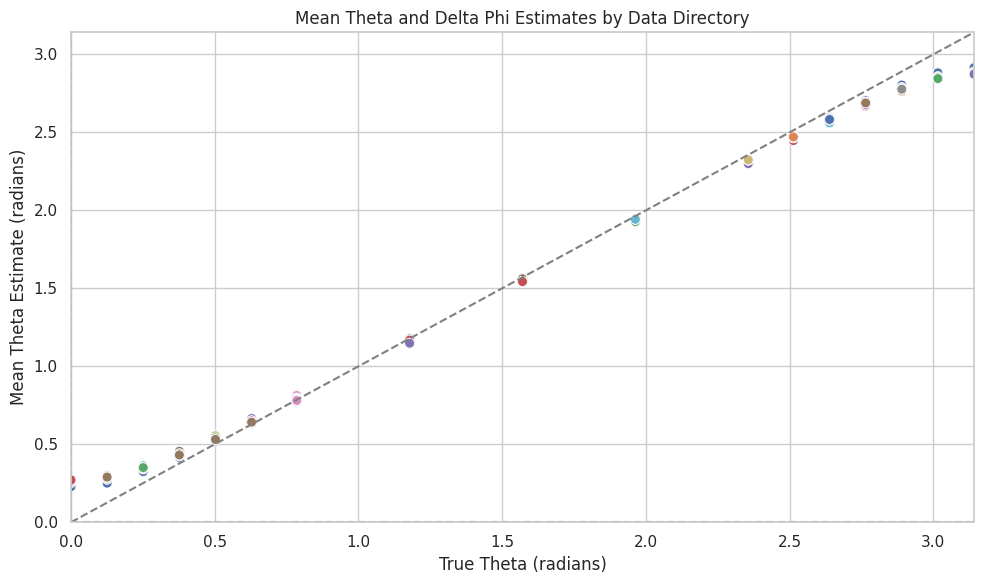

In [9]:
# plot the means as a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=estimates_summary_df, x=("theta", "mean"),
                y=("theta_estimate", "mean"),
                hue="N", palette="deep", s=50)
plt.title("Mean Theta and Delta Phi Estimates by Data Directory")
plt.xlabel("True Theta (radians)")
plt.ylabel("Mean Theta Estimate (radians)")
plt.axline((0, 0), slope=1, color='gray', linestyle='--')

plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.xlim(0, np.pi)
plt.ylim(0, np.pi)
# no legend
plt.legend([], [], frameon=False)
plt.tight_layout()
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "mean_theta_delta_phi_estimates_by_data_dir.png")
plt.savefig(file_name, dpi=300)
plt.show()

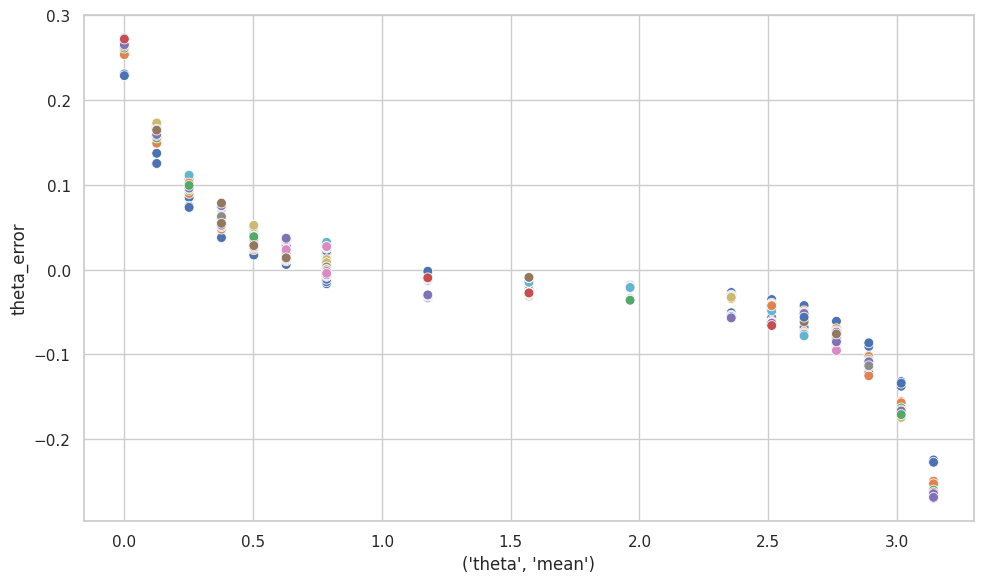

In [10]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=estimates_summary_df, x=("theta", "mean"),
                y=("theta_error"),
                hue="N", palette="deep", s=50)

# no legend
plt.legend([], [], frameon=False)

plt.tight_layout()
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "mean_theta_error_by_data_dir.png")
plt.savefig(file_name, dpi=300)
plt.show()

In [11]:
fixed_n_estimates_summary_df = estimates_summary_df[estimates_summary_df["N"].isin([40, 80, 120, 160, 200])].reset_index(drop=True)
fixed_n_estimates_summary_df

Data Directory      N theta_estimate                      \
                                              mean       std       var   
0    2025-06-03--11h-02m-55s   40.0       0.229990  0.144735  0.020948   
1    2025-06-03--11h-02m-55s   80.0       0.254714  0.093813  0.008801   
2    2025-06-03--11h-02m-55s  120.0       0.261684  0.071774  0.005152   
3    2025-06-03--11h-02m-55s  160.0       0.264478  0.060438  0.003653   
4    2025-06-03--11h-02m-55s  200.0       0.266035  0.053027  0.002812   
..                       ...    ...            ...       ...       ...   
420  2025-06-03--13h-04m-03s   40.0       1.543115  0.111955  0.012534   
421  2025-06-03--13h-04m-03s   80.0       1.543203  0.079525  0.006324   
422  2025-06-03--13h-04m-03s  120.0       1.543229  0.064654  0.004180   
423  2025-06-03--13h-04m-03s  160.0       1.543241  0.056534  0.003196   
424  2025-06-03--13h-04m-03s  200.0       1.543244  0.050254  0.002525   

    delta_phi_estimate                         theta delta_phi   2_n_var  \
                  mean       std       var      mean      mean             
0             1.499747  0.270235  0.073027  0.000000  0.000000  1.675867   
1             1.492284  0.227033  0.051544  0.000000  0.000000  1.408135   
2             1.479581  0.215937  0.046629  0.000000  0.000000  1.236365   
3             1.471318  0.197450  0.038987  0.000000  0.000000  1.168878   
4             1.463144  0.185851  0.034540  0.000000  0.000000  1.124747   
..                 ...       ...       ...       ...       ...       ...   
420           1.452075  0.135179  0.018273  1.570796  1.570796  1.002710   
421           1.425073  0.104031  0.010822  1.570796  1.570796  1.011875   
422           1.413563  0.085079  0.007238  1.570796  1.570796  1.003228   
423           1.406683  0.070865  0.005022  1.570796  1.570796  1.022745   
424           1.401987  0.058763  0.003453  1.570796  1.570796  1.010177   

    theta_error root_n_theta_error  
                                    
0      0.229990           1.454584  
1      0.254714           2.278230  
2      0.261684           2.866600  
3      0.264478           3.345417  
4      0.266035           3.762300  
..          ...                ...  
420   -0.027682          -0.175074  
421   -0.027593          -0.246803  
422   -0.027568          -0.301989  
423   -0.027555          -0.348547  
424   -0.027552          -0.389643  

[425 rows x 13 columns]

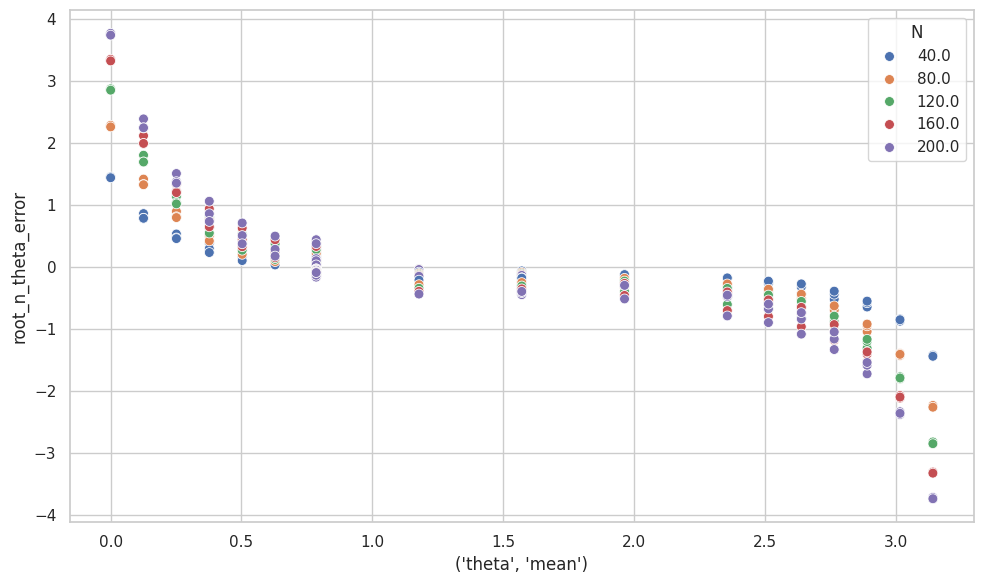

In [12]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=fixed_n_estimates_summary_df, x=("theta", "mean"),
                y=("root_n_theta_error"),
                hue="N", palette="deep", s=50)


plt.tight_layout()
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "mean_theta_error_by_data_dir.png")
plt.savefig(file_name, dpi=300)
plt.show()

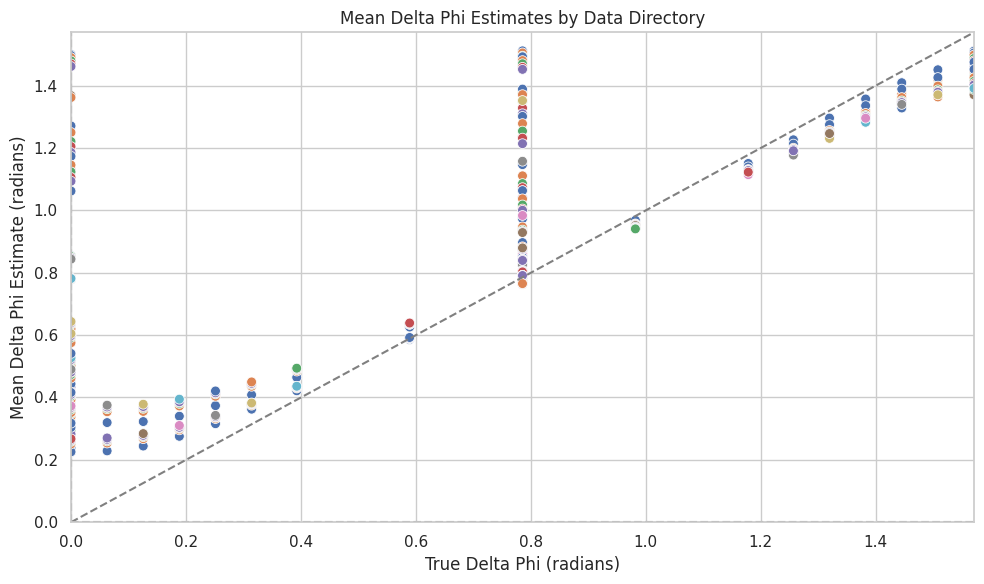

In [13]:
# plot the means as a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=estimates_summary_df, x=("delta_phi", "mean"),
                y=("delta_phi_estimate", "mean"),
                hue=estimates_summary_df["N"].astype(str),
                palette="deep", s=50)
plt.title("Mean Delta Phi Estimates by Data Directory")
plt.xlabel("True Delta Phi (radians)")
plt.ylabel("Mean Delta Phi Estimate (radians)")

plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')

plt.axline((0, 0), slope=1, color='gray', linestyle='--')

plt.xlim(0, np.pi/2)
plt.ylim(0, np.pi/2)

# no legend
plt.legend([], [], frameon=False)
plt.tight_layout()
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "mean_delta_phi_theta_estimates_by_data_dir.png")
plt.savefig(file_name, dpi=300)
plt.show()

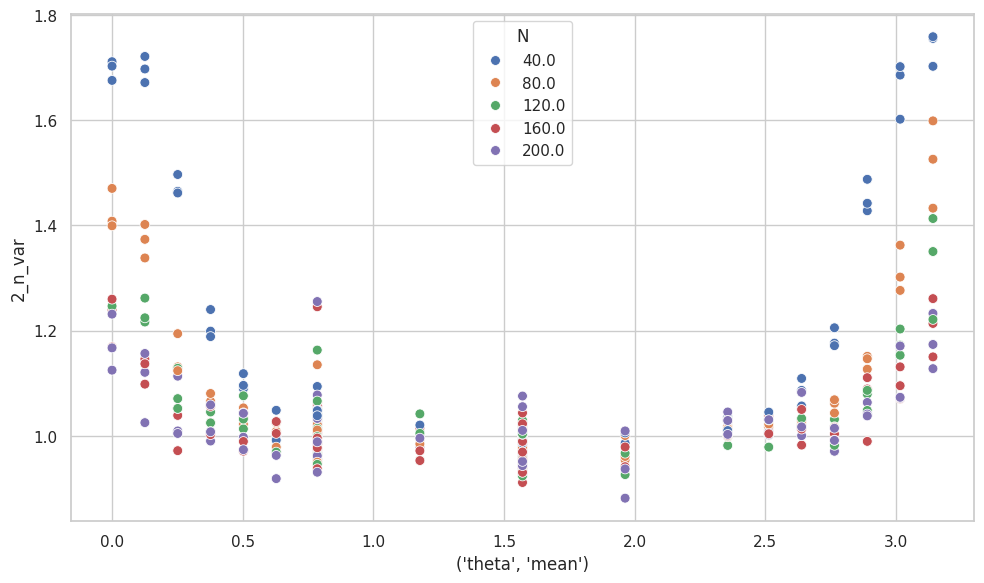

In [14]:
# plot the variances against the true value of theta as a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=fixed_n_estimates_summary_df, x=("theta", "mean"), y=("2_n_var"),
                hue=fixed_n_estimates_summary_df["N"].astype(str),
                palette="deep", s=50)


plt.tight_layout()
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "variance_theta_delta_phi_estimates_by_data_dir.png")
plt.savefig(file_name, dpi=300)
plt.show()

# Best guess estimators 

Using all samples in the data_dir to estimate

In [15]:
# Row of max N in each data_dir
estimates_summary_df["max_N"] = estimates_summary_df.groupby("Data Directory")["N"].transform("max")
# Filter to keep only the rows with the maximum N for each data_dir
best_guess_estimators = estimates_summary_df[estimates_summary_df["N"] == estimates_summary_df["max_N"]].reset_index(drop=True)

best_guess_estimators


Data Directory         N theta_estimate          \
                                                mean std var   
0   2025-06-03--11h-02m-55s  266459.5       0.271458 NaN NaN   
1   2025-06-03--11h-04m-33s  263362.5       0.298465 NaN NaN   
2   2025-06-03--11h-05m-58s  264931.5       0.362452 NaN NaN   
3   2025-06-03--11h-07m-21s  266878.0       0.455342 NaN NaN   
4   2025-06-03--11h-08m-43s  268354.5       0.554799 NaN NaN   
..                      ...       ...            ...  ..  ..   
80  2025-06-03--12h-58m-28s  248532.0       1.539616 NaN NaN   
81  2025-06-03--12h-59m-52s  251370.5       1.541835 NaN NaN   
82  2025-06-03--13h-01m-14s  250208.5       1.543536 NaN NaN   
83  2025-06-03--13h-02m-38s  249451.0       1.543669 NaN NaN   
84  2025-06-03--13h-04m-03s  246954.5       1.543290 NaN NaN   

   delta_phi_estimate             theta delta_phi 2_n_var theta_error  \
                 mean std var      mean      mean                       
0            1.367953 NaN NaN  0.000000  0.000000     NaN    0.271458   
1            1.130823 NaN NaN  0.125664  0.000000     NaN    0.172801   
2            0.843650 NaN NaN  0.251327  0.000000     NaN    0.111124   
3            0.643671 NaN NaN  0.376991  0.000000     NaN    0.078351   
4            0.527501 NaN NaN  0.502655  0.000000     NaN    0.052144   
..                ...  ..  ..       ...       ...     ...         ...   
80           1.246337 NaN NaN  1.570796  1.319469     NaN   -0.031180   
81           1.295481 NaN NaN  1.570796  1.382301     NaN   -0.028961   
82           1.339639 NaN NaN  1.570796  1.445133     NaN   -0.027261   
83           1.370465 NaN NaN  1.570796  1.507964     NaN   -0.027127   
84           1.391249 NaN NaN  1.570796  1.570796     NaN   -0.027507   

   root_n_theta_error     max_N  
                                 
0          140.125945  266459.5  
1           88.679496  263362.5  
2           57.197284  264931.5  
3           40.476171  266878.0  
4           27.012313  268354.5  
..                ...       ...  
80         -15.544216  248532.0  
81         -14.520290  251370.5  
82         -13.636005  250208.5  
83         -13.548544  249451.0  
84         -13.669227  246954.5  

[85 rows x 14 columns]

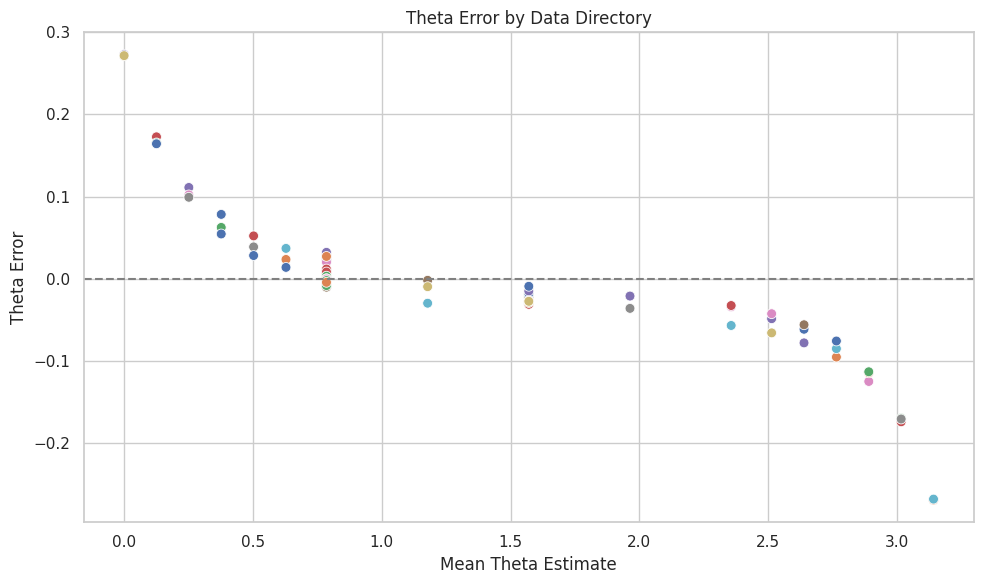

In [16]:
# plot the theta_error
plt.figure(figsize=(10, 6))
sns.scatterplot(data=best_guess_estimators, x=("theta", "mean"),
                y=("theta_error"),
                hue="N", palette="deep", s=50)
plt.title("Theta Error by Data Directory")
plt.xlabel("Mean Theta Estimate")
plt.ylabel("Theta Error")
plt.axhline(0, color='gray', linestyle='--')

plt.legend([], [], frameon=False)
plt.tight_layout()
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "best_guess_theta_error_by_data_dir.png")
plt.savefig(file_name, dpi=300)

plt.show()

In [17]:
best_guess_estimators

# flatten the best_guess_estimators DataFrame
best_guess_estimators_flat = best_guess_estimators.copy()
best_guess_estimators_flat.columns = ['_'.join(col).strip() for col in best_guess_estimators_flat.columns.values]
best_guess_estimators_flat

,Data Directory_,N_,theta_estimate_mean,theta_estimate_std,theta_estimate_var,delta_phi_estimate_mean,delta_phi_estimate_std,delta_phi_estimate_var,theta_mean,delta_phi_mean,2_n_var_,theta_error_,root_n_theta_error_,max_N_
0,2025-06-03--11h-02m-55s,266459.5,0.271458,NaN,NaN,1.367953,NaN,NaN,0.000000,0.000000,NaN,0.271458,140.125945,266459.5
1,2025-06-03--11h-04m-33s,263362.5,0.298465,NaN,NaN,1.130823,NaN,NaN,0.125664,0.000000,NaN,0.172801,88.679496,263362.5
2,2025-06-03--11h-05m-58s,264931.5,0.362452,NaN,NaN,0.843650,NaN,NaN,0.251327,0.000000,NaN,0.111124,57.197284,264931.5
3,2025-06-03--11h-07m-21s,266878.0,0.455342,NaN,NaN,0.643671,NaN,NaN,0.376991,0.000000,NaN,0.078351,40.476171,266878.0
4,2025-06-03--11h-08m-43s,268354.5,0.554799,NaN,NaN,0.527501,NaN,NaN,0.502655,0.000000,NaN,0.052144,27.012313,268354.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,2025-06-03--12h-58m-28s,248532.0,1.539616,NaN,NaN,1.246337,NaN,NaN,1.570796,1.319469,NaN,-0.031180,-15.544216,248532.0
81,2025-06-03--12h-59m-52s,251370.5,1.541835,NaN,NaN,1.295481,NaN,NaN,1.570796,1.382301,NaN,-0.028961,-14.520290,251370.5
82,2025-06-03--13h-01m-14s,250208.5,1.543536,NaN,NaN,1.339639,NaN,NaN,1.570796,1.445133,NaN,-0.027261,-13.636005,250208.5
83,2025-06-03--13h-02m-38s,249451.0,1.543669,NaN,NaN,1.370465,NaN,NaN,1.570796,1.507964,NaN,-0.027127,-13.548544,249451.0


In [18]:
known_theta_offset = best_guess_estimators_flat.groupby("theta_mean").agg({
    "theta_estimate_mean": ["mean"],
}).reset_index().rename(columns={"theta_mean": "True Theta (radians)"})

known_theta_offset.columns = ["prepared_theta", "best_guess_estimator_theta"]
known_theta_offset

,prepared_theta,best_guess_estimator_theta
0,0.000000,0.272025
1,0.125664,0.293166
2,0.251327,0.355457
3,0.376991,0.442096
4,0.502655,0.542365
5,0.628319,0.653055
6,0.785398,0.798240
7,1.178097,1.164270
8,1.570796,1.548231
9,1.963495,1.937440


In [19]:
# flatten the fixed_n_estimates_summary_df
fixed_n_estimates_summary_df_flat = fixed_n_estimates_summary_df.copy()
fixed_n_estimates_summary_df_flat.columns = ['_'.join(col).strip() for col in fixed_n_estimates_summary_df_flat.columns.values]

fixed_n_estimates_summary_df_flat["theta_mean"] = np.round(fixed_n_estimates_summary_df_flat["theta_mean"].astype(float), 4)
known_theta_offset["prepared_theta"] = np.round(known_theta_offset["prepared_theta"].astype(float), 4)

# join the known_theta_offset with the fixed_n_estimates_summary_df
fixed_n_theta_offsets = fixed_n_estimates_summary_df_flat.merge(known_theta_offset, 
                                        left_on="theta_mean",
                                        right_on="prepared_theta",
)

fixed_n_theta_offsets = fixed_n_theta_offsets.drop(columns=["prepared_theta"])
fixed_n_theta_offsets

,Data Directory_,N_,theta_estimate_mean,theta_estimate_std,theta_estimate_var,delta_phi_estimate_mean,delta_phi_estimate_std,delta_phi_estimate_var,theta_mean,delta_phi_mean,2_n_var_,theta_error_,root_n_theta_error_,best_guess_estimator_theta
0,2025-06-03--11h-02m-55s,40.0,0.229990,0.144735,0.020948,1.499747,0.270235,0.073027,0.0000,0.000000,1.675867,0.229990,1.454584,0.272025
1,2025-06-03--11h-02m-55s,80.0,0.254714,0.093813,0.008801,1.492284,0.227033,0.051544,0.0000,0.000000,1.408135,0.254714,2.278230,0.272025
2,2025-06-03--11h-02m-55s,120.0,0.261684,0.071774,0.005152,1.479581,0.215937,0.046629,0.0000,0.000000,1.236365,0.261684,2.866600,0.272025
3,2025-06-03--11h-02m-55s,160.0,0.264478,0.060438,0.003653,1.471318,0.197450,0.038987,0.0000,0.000000,1.168878,0.264478,3.345417,0.272025
4,2025-06-03--11h-02m-55s,200.0,0.266035,0.053027,0.002812,1.463144,0.185851,0.034540,0.0000,0.000000,1.124747,0.266035,3.762300,0.272025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,2025-06-03--13h-04m-03s,40.0,1.543115,0.111955,0.012534,1.452075,0.135179,0.018273,1.5708,1.570796,1.002710,-0.027682,-0.175074,1.548231
421,2025-06-03--13h-04m-03s,80.0,1.543203,0.079525,0.006324,1.425073,0.104031,0.010822,1.5708,1.570796,1.011875,-0.027593,-0.246803,1.548231
422,2025-06-03--13h-04m-03s,120.0,1.543229,0.064654,0.004180,1.413563,0.085079,0.007238,1.5708,1.570796,1.003228,-0.027568,-0.301989,1.548231
423,2025-06-03--13h-04m-03s,160.0,1.543241,0.056534,0.003196,1.406683,0.070865,0.005022,1.5708,1.570796,1.022745,-0.027555,-0.348547,1.548231


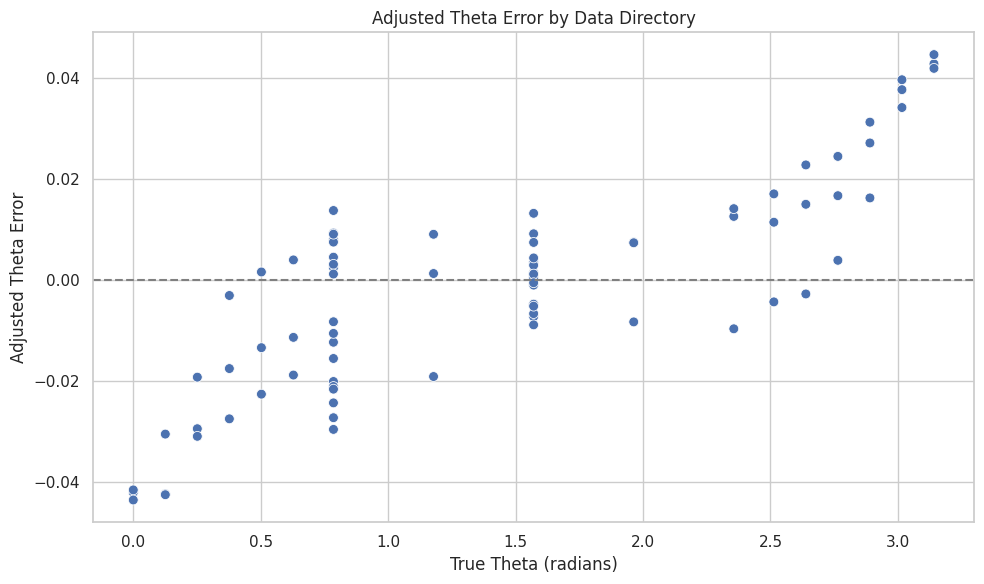

In [20]:
fixed_n_theta_offsets["adjusted_theta_error"] = (fixed_n_theta_offsets["theta_estimate_mean"] - fixed_n_theta_offsets["best_guess_estimator_theta"])
# plot the adjusted theta error
plt.figure(figsize=(10, 6))
sns.scatterplot(data=fixed_n_theta_offsets[fixed_n_theta_offsets["N_"].isin([40])],
                x="theta_mean",
                y="adjusted_theta_error",
                hue=fixed_n_theta_offsets["N_"].astype(str),
                palette="deep", s=50)
plt.title("Adjusted Theta Error by Data Directory")
plt.xlabel("True Theta (radians)")
plt.ylabel("Adjusted Theta Error")
plt.axhline(0, color='gray', linestyle='--')
plt.legend([], [], frameon=False)
plt.tight_layout()

plt.show()

In [21]:
adjusted_theta_offsets_for_plot = fixed_n_theta_offsets.groupby(["theta_mean", "N_"]).agg({
    "adjusted_theta_error": ["mean", "std", "var"],
    "theta_estimate_mean": ["mean", "std", "var"],
    "best_guess_estimator_theta": ["mean", "std", "var"]
}).reset_index().rename(columns={"theta_mean": "True Theta (radians)"})
adjusted_theta_offsets_for_plot["normalised_adjusted_theta_error"] = adjusted_theta_offsets_for_plot["adjusted_theta_error"]["mean"] * np.sqrt(adjusted_theta_offsets_for_plot["N_"]) 
adjusted_theta_offsets_for_plot["normalised_adjusted_theta_error_std"] = adjusted_theta_offsets_for_plot["adjusted_theta_error"]["std"] * np.sqrt(adjusted_theta_offsets_for_plot["N_"])
adjusted_theta_offsets_for_plot

True Theta (radians)     N_ adjusted_theta_error                          \
                                               mean       std           var   
0                0.0000   40.0            -0.042358  0.001036  1.072419e-06   
1                0.0000   80.0            -0.017310  0.001407  1.980216e-06   
2                0.0000  120.0            -0.010183  0.000968  9.367002e-07   
3                0.0000  160.0            -0.007650  0.001012  1.024555e-06   
4                0.0000  200.0            -0.006026  0.001057  1.116607e-06   
..                  ...    ...                  ...       ...           ...   
80               3.1416   40.0             0.043207  0.001390  1.932037e-06   
81               3.1416   80.0             0.017911  0.001663  2.764337e-06   
82               3.1416  120.0             0.010242  0.001334  1.780768e-06   
83               3.1416  160.0             0.006940  0.000769  5.907352e-07   
84               3.1416  200.0             0.005377  0.000940  8.835858e-07   

   theta_estimate_mean                         best_guess_estimator_theta  \
                  mean       std           var                       mean   
0             0.229667  0.001036  1.072419e-06                   0.272025   
1             0.254715  0.001407  1.980216e-06                   0.272025   
2             0.261842  0.000968  9.367002e-07                   0.272025   
3             0.264375  0.001012  1.024555e-06                   0.272025   
4             0.266000  0.001057  1.116607e-06                   0.272025   
..                 ...       ...           ...                        ...   
80            2.915699  0.001390  1.932037e-06                   2.872492   
81            2.890403  0.001663  2.764337e-06                   2.872492   
82            2.882734  0.001334  1.780768e-06                   2.872492   
83            2.879432  0.000769  5.907352e-07                   2.872492   
84            2.877869  0.000940  8.835858e-07                   2.872492   

             normalised_adjusted_theta_error  \
    std  var                                   
0   0.0  0.0                       -0.267897   
1   0.0  0.0                       -0.154827   
2   0.0  0.0                       -0.111554   
3   0.0  0.0                       -0.096772   
4   0.0  0.0                       -0.085214   
..  ...  ...                             ...   
80  0.0  0.0                        0.273268   
81  0.0  0.0                        0.160203   
82  0.0  0.0                        0.112193   
83  0.0  0.0                        0.087782   
84  0.0  0.0                        0.076041   

   normalised_adjusted_theta_error_std  
                                        
0                             0.006550  
1                             0.012586  
2                             0.010602  
3                             0.012803  
4                             0.014944  
..                                 ...  
80                            0.008791  
81                            0.014871  
82                            0.014618  
83                            0.009722  
84                            0.013294  

[85 rows x 13 columns]

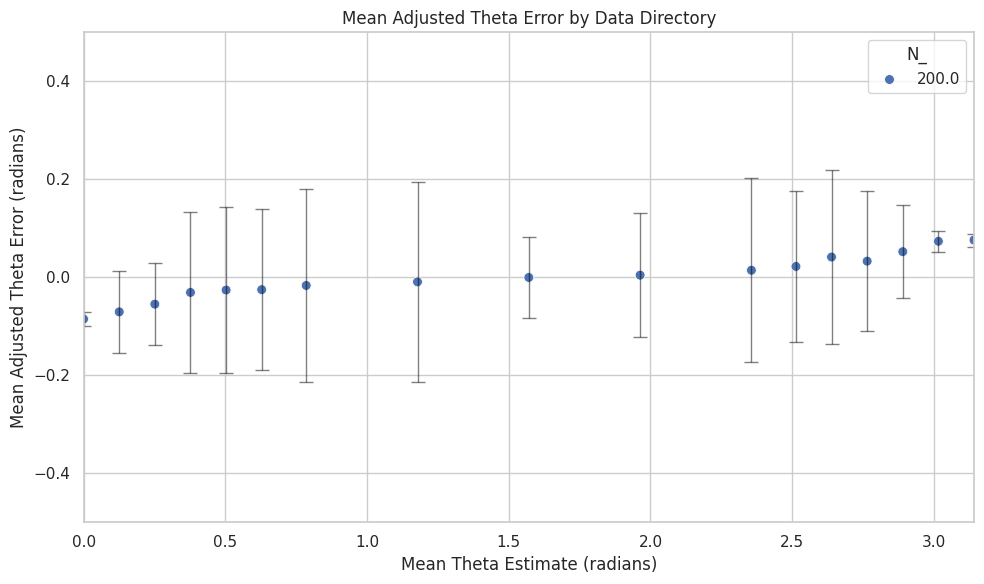

In [31]:
subset = adjusted_theta_offsets_for_plot[adjusted_theta_offsets_for_plot["N_"].isin([200])]

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=subset,
    x="True Theta (radians)",
    y="normalised_adjusted_theta_error",
    hue=subset["N_"].astype(str),
    palette="deep",
    s=50
)

plt.errorbar(
    subset["True Theta (radians)"],
    subset["normalised_adjusted_theta_error"],
    yerr=subset["normalised_adjusted_theta_error_std"],
    fmt='none',  # Do not plot lines or markers
    ecolor='black',
    capsize=5,
    elinewidth=1,
    alpha=0.5
)

plt.title("Mean Adjusted Theta Error by Data Directory")
plt.xlabel("Mean Theta Estimate (radians)")
plt.ylabel("Mean Adjusted Theta Error (radians)")
plt.xlim(0, np.pi)
plt.ylim(-0.5, 0.5)

plt.tight_layout()
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "mean_adjusted_theta_error_by_data_dir.png")
# plt.savefig(file_name, dpi=300)
plt.show()

## V2
### Theta

In [95]:
# round N to the nearest 40
estimates_df["nearest_40_N"] = estimates_df["N"].apply(lambda x: round(x / 40) * 40)
estimates_df

,data_dir,C,DB_H,DB_V,SB,N,repetition,theta_estimate,delta_phi_estimate,theta,delta_phi,theta_degrees,delta_phi_degrees,nearest_40_N
0,2025-06-03--11h-02m-55s,1.0,39.0,0.0,0.0,40.0,NaN,0.224075,1.570796,0.000000,0.000000,0.0,0.0,40
1,2025-06-03--11h-02m-55s,3.0,37.0,0.0,0.0,40.0,NaN,0.389761,1.570796,0.000000,0.000000,0.0,0.0,40
2,2025-06-03--11h-02m-55s,1.0,39.0,0.0,0.0,40.0,NaN,0.224075,1.570796,0.000000,0.000000,0.0,0.0,40
3,2025-06-03--11h-02m-55s,1.0,39.0,0.0,0.0,40.0,NaN,0.224075,1.570796,0.000000,0.000000,0.0,0.0,40
4,2025-06-03--11h-02m-55s,3.0,37.0,0.0,0.0,40.0,NaN,0.389761,1.570796,0.000000,0.000000,0.0,0.0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251146,2025-06-03--13h-04m-03s,102.0,52.0,43.0,3.0,200.0,NaN,1.525781,1.400950,1.570796,1.570796,90.0,90.0,200
1251147,2025-06-03--13h-04m-03s,112.0,46.0,41.0,1.0,200.0,NaN,1.545794,1.476585,1.570796,1.570796,90.0,90.0,200
1251148,2025-06-03--13h-04m-03s,107.0,57.0,32.0,4.0,200.0,NaN,1.445468,1.379806,1.570796,1.570796,90.0,90.0,200
1251149,2025-06-03--13h-04m-03s,76.0,67.0,52.0,5.0,200.0,NaN,1.495726,1.319715,1.570796,1.570796,90.0,90.0,200


In [96]:
theta_estimates = estimates_df.groupby(["N", "theta"]).agg({
    "theta_estimate": ["mean", "std", "var",],
    "theta": "count",
    "delta_phi_estimate": ["mean", "std", "var"]
}).reset_index().rename(columns={"nearest_40_N": "N (rounded to nearest 40)"})
theta_estimates.columns = ['_'.join(col).strip() for col in theta_estimates.columns.values]
theta_estimates

,N_,theta_,theta_estimate_mean,theta_estimate_std,theta_estimate_var,theta_count,delta_phi_estimate_mean,delta_phi_estimate_std,delta_phi_estimate_var
0,40.0,0.000000,0.229671,0.145633,0.021209,20024,1.506216,0.257929,0.066527
1,40.0,0.125664,0.254710,0.145746,0.021242,19918,1.389550,0.402135,0.161712
2,40.0,0.251327,0.328970,0.135854,0.018456,19818,1.169089,0.512994,0.263163
3,40.0,0.376991,0.426162,0.123345,0.015214,19900,1.019609,0.521528,0.271991
4,40.0,0.502655,0.531044,0.117737,0.013862,19930,0.935730,0.509485,0.259575
...,...,...,...,...,...,...,...,...,...
165,266878.0,0.376991,0.455342,NaN,NaN,1,0.643671,NaN,NaN
166,267098.5,0.785398,0.808003,NaN,NaN,1,0.394661,NaN,NaN
167,267767.0,0.125664,0.291031,NaN,NaN,1,1.234777,NaN,NaN
168,268354.5,0.502655,0.554799,NaN,NaN,1,0.527501,NaN,NaN


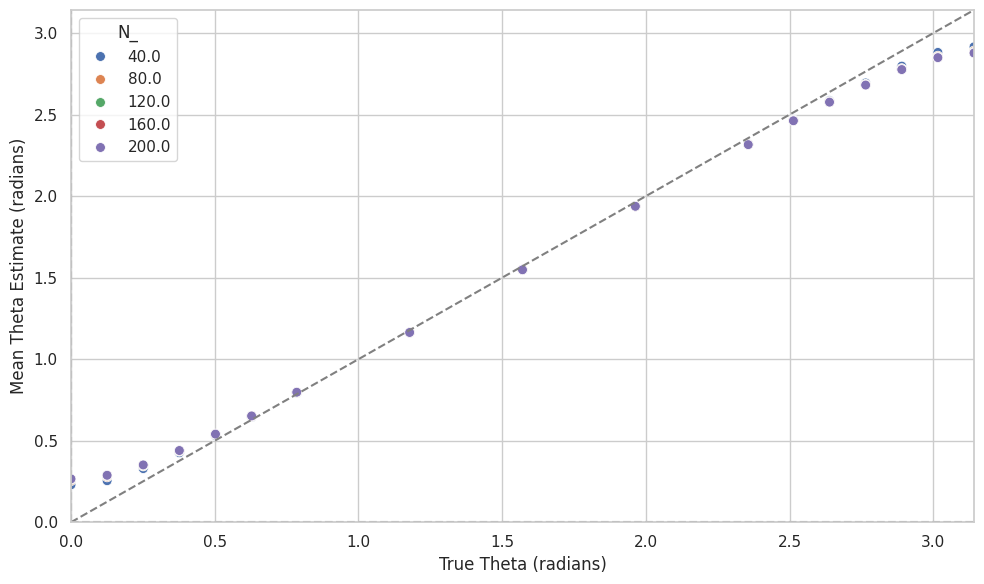

In [97]:
# plot theta_estimates
plt.figure(figsize=(10, 6))
sns.scatterplot(data=theta_estimates[theta_estimates["N_"] < 201], x="theta_", y="theta_estimate_mean", hue="N_", palette="deep", s=50)

plt.xlabel("True Theta (radians)")
plt.ylabel("Mean Theta Estimate (radians)")
plt.axline((0, 0), slope=1, color='gray', linestyle='--')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.xlim(0, np.pi)
plt.ylim(0, np.pi)
# no legend

plt.tight_layout()
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "mean_theta_estimates_by_N.png")
plt.savefig(file_name, dpi=300)
plt.show()

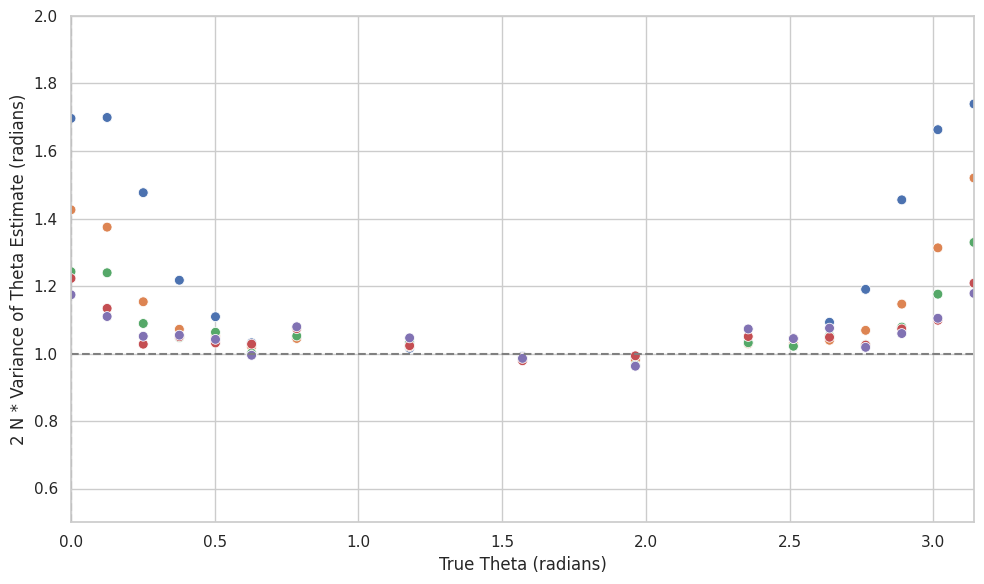

In [98]:
# plot theta_estimates
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=theta_estimates[theta_estimates["N_"].isin([40, 80, 120, 160, 200])],
    x="theta_",
    y=theta_estimates["theta_estimate_var"] * 2 * theta_estimates["N_"],
    hue="N_",
    palette="deep",
    s=50,
)
plt.xlabel("True Theta (radians)")
plt.ylabel("2 N * Variance of Theta Estimate (radians)")

plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.axline((0, 1), slope=0, color='gray', linestyle='--')

plt.xlim(0, np.pi)
plt.ylim(0.5, 2)

# no legend
plt.legend([], [], frameon=False)
plt.tight_layout()
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "variance_theta_estimates_by_N.png"
)
plt.savefig(file_name, dpi=300)
plt.show()

### Delta Phi

In [99]:
# only when theta = pi/2 or pi/4
delta_phi_estimates = estimates_df[
    estimates_df["theta"].isin([np.pi / 2, np.pi / 4])
].groupby(["N", "theta", "delta_phi"]).agg({
    "delta_phi_estimate": ["mean", "std", "var",],
    "delta_phi": "count",
}).reset_index()
delta_phi_estimates.columns = ['_'.join(col).strip() for col in delta_phi_estimates.columns.values]
delta_phi_estimates

,N_,theta_,delta_phi_,delta_phi_estimate_mean,delta_phi_estimate_std,delta_phi_estimate_var,delta_phi_count
0,40.0,0.785398,0.000000,0.318743,0.210155,0.044165,13308
1,40.0,0.785398,0.062832,0.319584,0.209257,0.043789,6621
2,40.0,0.785398,0.125664,0.322832,0.208247,0.043367,6636
3,40.0,0.785398,0.188496,0.340059,0.209536,0.043905,6683
4,40.0,0.785398,0.251327,0.373886,0.205180,0.042099,6602
...,...,...,...,...,...,...,...
205,265936.5,1.570796,0.125664,0.284267,NaN,NaN,1
206,266145.5,0.785398,0.314159,0.449904,NaN,NaN,1
207,266545.0,1.570796,0.062832,0.270251,NaN,NaN,1
208,266651.5,0.785398,0.000000,0.372792,NaN,NaN,1


#### Theta = pi/2

In [100]:
delta_phi_estimates_theta_pi_over_2 = delta_phi_estimates[delta_phi_estimates["theta_"] == np.pi / 2]
delta_phi_estimates_theta_pi_over_2

,N_,theta_,delta_phi_,delta_phi_estimate_mean,delta_phi_estimate_std,delta_phi_estimate_var,delta_phi_count
17,40.0,1.570796,0.000000,0.225553,0.150408,0.022623,13225
18,40.0,1.570796,0.062832,0.228833,0.148978,0.022194,6668
19,40.0,1.570796,0.125664,0.244328,0.148423,0.022029,6650
20,40.0,1.570796,0.188496,0.275561,0.144756,0.020954,6614
21,40.0,1.570796,0.251327,0.315899,0.139818,0.019549,6579
...,...,...,...,...,...,...,...
197,264104.5,1.570796,0.188496,0.310210,NaN,NaN,1
198,264245.5,1.570796,0.000000,0.268606,NaN,NaN,1
199,264590.5,1.570796,0.000000,0.267484,NaN,NaN,1
205,265936.5,1.570796,0.125664,0.284267,NaN,NaN,1


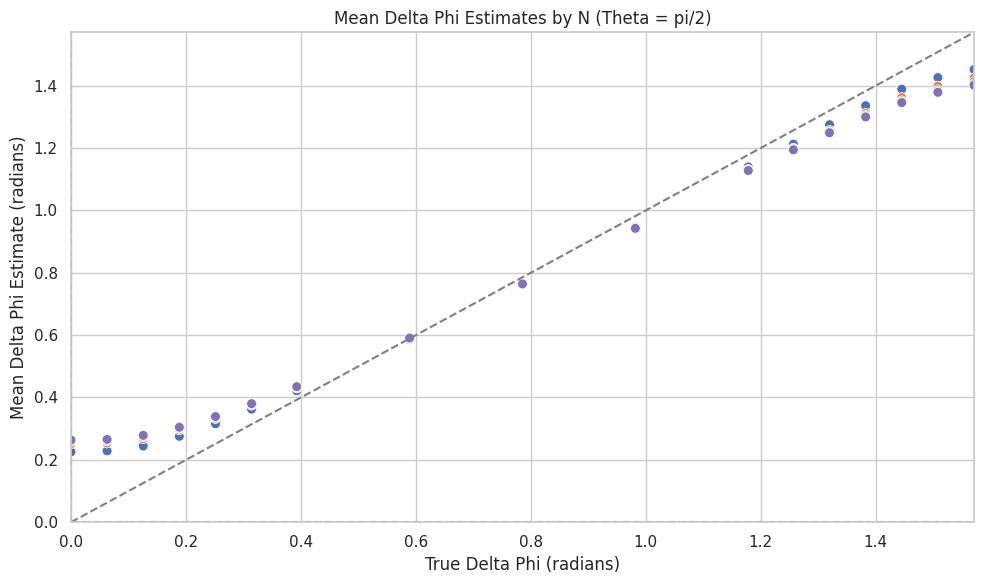

In [101]:
# plot delta_phi_estimates
plt.figure(figsize=(10, 6))
sns.scatterplot(data=delta_phi_estimates_theta_pi_over_2[delta_phi_estimates_theta_pi_over_2["N_"] < 201], x="delta_phi_", y="delta_phi_estimate_mean", hue="N_", palette="deep", s=50)

plt.xlabel("True Delta Phi (radians)")
plt.ylabel("Mean Delta Phi Estimate (radians)")
plt.axline((0, 0), slope=1, color='gray', linestyle='--')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.xlim(0, np.pi/2 )
plt.ylim(0, np.pi/2)

# no legend
plt.legend([], [], frameon=False)

plt.title("Mean Delta Phi Estimates by N (Theta = pi/2)")

plt.tight_layout()
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "mean_delta_phi_estimates_by_N_theta_pi_over_2.png")
plt.savefig(file_name, dpi=300)
plt.show()

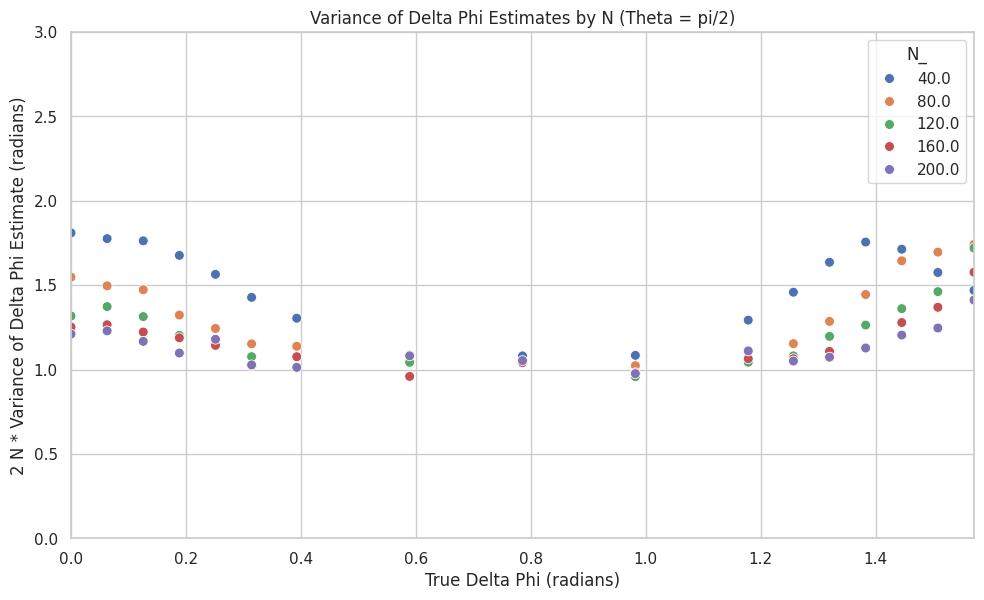

In [102]:
# plot delta_phi_estimates
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=delta_phi_estimates_theta_pi_over_2[delta_phi_estimates_theta_pi_over_2["N_"].isin([40, 80, 120, 160, 200])],
    x="delta_phi_",
    y=delta_phi_estimates_theta_pi_over_2["delta_phi_estimate_var"] * 2 * delta_phi_estimates_theta_pi_over_2["N_"],
    hue="N_",
    palette="deep",
    s=50,
)
plt.xlabel("True Delta Phi (radians)")
plt.ylabel("2 N * Variance of Delta Phi Estimate (radians)")

plt.xlim(0, np.pi/2)
plt.ylim(0, 3)
# no legend
plt.tight_layout()

plt.title("Variance of Delta Phi Estimates by N (Theta = pi/2)")

file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "variance_delta_phi_estimates_by_N_theta_pi_over_2.png"
)
plt.savefig(file_name, dpi=300)
plt.show()

#### Theta = pi/4

In [103]:
delta_phi_estimates_theta_pi_over_4 = delta_phi_estimates[delta_phi_estimates["theta_"] == np.pi / 4]
delta_phi_estimates_theta_pi_over_4

,N_,theta_,delta_phi_,delta_phi_estimate_mean,delta_phi_estimate_std,delta_phi_estimate_var,delta_phi_count
0,40.0,0.785398,0.000000,0.318743,0.210155,0.044165,13308
1,40.0,0.785398,0.062832,0.319584,0.209257,0.043789,6621
2,40.0,0.785398,0.125664,0.322832,0.208247,0.043367,6636
3,40.0,0.785398,0.188496,0.340059,0.209536,0.043905,6683
4,40.0,0.785398,0.251327,0.373886,0.205180,0.042099,6602
...,...,...,...,...,...,...,...
203,265617.0,0.785398,0.125664,0.378430,NaN,NaN,1
204,265913.5,0.785398,0.000000,0.375405,NaN,NaN,1
206,266145.5,0.785398,0.314159,0.449904,NaN,NaN,1
208,266651.5,0.785398,0.000000,0.372792,NaN,NaN,1


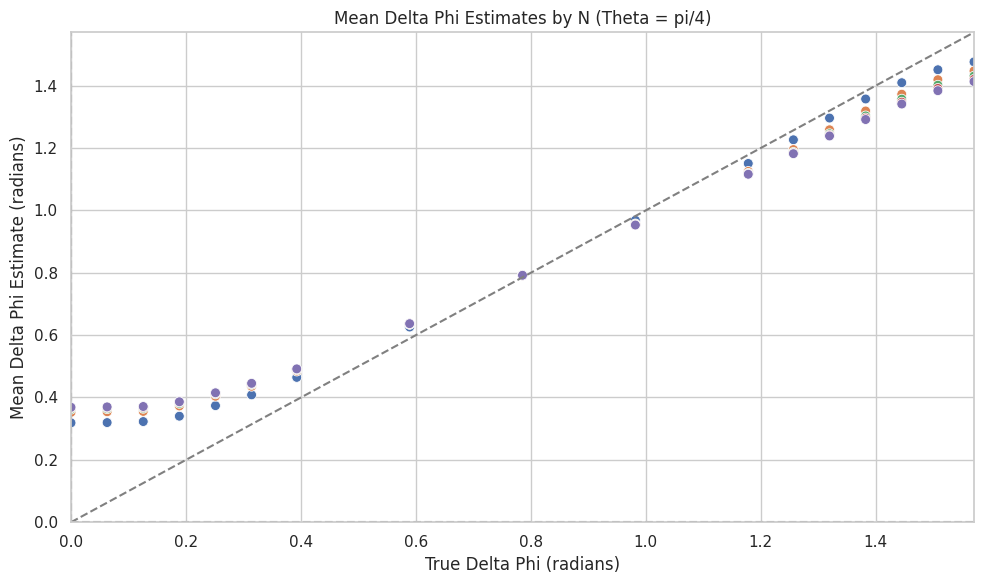

In [104]:
# plot delta_phi_estimates
plt.figure(figsize=(10, 6))
sns.scatterplot(data=delta_phi_estimates_theta_pi_over_4[delta_phi_estimates_theta_pi_over_4["N_"] < 201], x="delta_phi_", y="delta_phi_estimate_mean", hue="N_", palette="deep", s=50)

plt.xlabel("True Delta Phi (radians)")
plt.ylabel("Mean Delta Phi Estimate (radians)")
plt.axline((0, 0), slope=1, color='gray', linestyle='--')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.xlim(0, np.pi/2 )
plt.ylim(0, np.pi/2)

# no legend
plt.legend([], [], frameon=False)

plt.title("Mean Delta Phi Estimates by N (Theta = pi/4)")

plt.tight_layout()
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "mean_delta_phi_estimates_by_N_theta_pi_over_4.png")
plt.savefig(file_name, dpi=300)
plt.show()

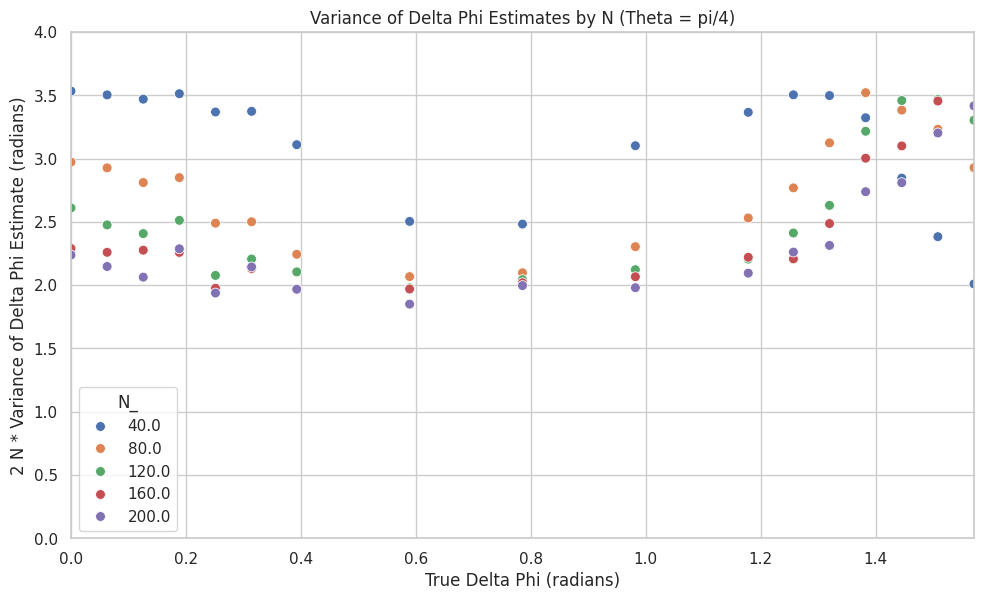

In [105]:
# plot delta_phi_estimates
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=delta_phi_estimates_theta_pi_over_4[delta_phi_estimates_theta_pi_over_4["N_"].isin([40, 80, 120, 160, 200])],
    x="delta_phi_",
    y=delta_phi_estimates_theta_pi_over_4["delta_phi_estimate_var"] * 2 * delta_phi_estimates_theta_pi_over_4["N_"],
    hue="N_",
    palette="deep",
    s=50,
)
plt.xlabel("True Delta Phi (radians)")
plt.ylabel("2 N * Variance of Delta Phi Estimate (radians)")

plt.xlim(0, np.pi/2)
plt.ylim(0, 4)
# no legend
plt.tight_layout()

plt.title("Variance of Delta Phi Estimates by N (Theta = pi/4)")

file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "variance_delta_phi_estimates_by_N_theta_pi_over_4.png"
)
plt.savefig(file_name, dpi=300)
plt.show()